In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,MaxPool1D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

print(tf.__version__)

2.6.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [ ]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17
Unpacking objects: 100% (17/17), done.


In [ ]:
test_dir = "/content/Data-Files-for-Feature-Selection/santander-test.csv"
train_dir = "/content/Data-Files-for-Feature-Selection/santander-train.csv"

In [ ]:
train = pd.read_csv(train_dir)
test = pd.read_csv(test_dir)

In [ ]:
print("Train Shape : {}".format(train.shape))
print()
print("Test Shape : {}".format(test.shape))

Train Shape : (76020, 371)

Test Shape : (75818, 370)


In [ ]:
X = train.drop(labels = ["ID","TARGET"] , axis = 1)
y = train["TARGET"]

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X, y , random_state = 0, test_size = 0.2, stratify = y)

In [ ]:
#for col in X.columns:
#
#    print(f"{col} Nunique : {X[col].nunique()}")

In [ ]:
filter = VarianceThreshold(threshold=0.01)

In [ ]:
X_train_filter = filter.fit_transform(X_train)
X_test_filter = filter.transform(X_test)

In [ ]:
# Control 

filter_columns = [col for col in X_train.columns if col not in X_train.columns[filter.get_support()]]
filter_columns[:4]

['ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var6_0']

In [ ]:
std = []

for col in X_train.columns: 
    
    if X_train[col].var() <= 0.01:
        
        std.append(col)

In [ ]:
std == filter_columns

True

In [ ]:
len(std),len(filter_columns)

(96, 96)

In [ ]:
for col in filter_columns:

    print(f"{col} Unique : {X_train[col].unique()}")

ind_var1 Unique : [0 1]
ind_var2_0 Unique : [0]
ind_var2 Unique : [0]
ind_var6_0 Unique : [0 1]
ind_var6 Unique : [0 1]
ind_var13_medio_0 Unique : [0 1]
ind_var13_medio Unique : [0 1]
ind_var14 Unique : [0 1]
ind_var17_0 Unique : [0 1]
ind_var17 Unique : [0 1]
ind_var18_0 Unique : [0 1]
ind_var18 Unique : [0 1]
ind_var19 Unique : [0 1]
ind_var20_0 Unique : [0 1]
ind_var20 Unique : [0 1]
ind_var27_0 Unique : [0]
ind_var28_0 Unique : [0]
ind_var28 Unique : [0]
ind_var27 Unique : [0]
ind_var29_0 Unique : [0 1]
ind_var29 Unique : [0 1]
ind_var30_0 Unique : [1 0]
ind_var31_0 Unique : [0 1]
ind_var31 Unique : [0 1]
ind_var32_cte Unique : [0 1]
ind_var32_0 Unique : [0 1]
ind_var32 Unique : [0 1]
ind_var33_0 Unique : [0 1]
ind_var33 Unique : [0 1]
ind_var34_0 Unique : [0 1]
ind_var34 Unique : [0 1]
ind_var40 Unique : [0 1]
ind_var41 Unique : [0]
ind_var39 Unique : [0 1]
ind_var44_0 Unique : [0 1]
ind_var44 Unique : [0 1]
ind_var46_0 Unique : [0]
ind_var46 Unique : [0]
num_var6_0 Unique : [0 3]

In [ ]:
X_train_filter.shape, X_train_filter.T.shape

((60816, 273), (273, 60816))

In [ ]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [ ]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [ ]:
X_train_T.duplicated().sum(),X_test_T.duplicated().sum()

(17, 38)

In [ ]:
duplicated_features = X_train_T.duplicated()

duplicated_index = [col for col in X_train_T.index if col in X_train_T.index[duplicated_features]]

In [ ]:
len(duplicated_index)

17

In [ ]:
duplicated_index

[38, 40, 44, 72, 74, 92, 97, 102, 123, 152, 153, 154, 155, 156, 157, 158, 254]

In [ ]:
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [ ]:
sum(X_train_T.loc[37] == X_train_T.loc[38]), X_train_T.shape[1]

(60644, 60816)

In [ ]:
last_train = X_train_T.loc[~duplicated_features,:].T
last_test = X_test_T.loc[~duplicated_features,:].T

In [ ]:
# Standart Scaler 

scaler = StandardScaler()

last_train = scaler.fit_transform(last_train)
last_test = scaler.transform(last_test)

In [ ]:
last_train.shape, last_test.shape

((60816, 256), (15204, 256))

In [ ]:
last_train = last_train.reshape(last_train.shape[0], last_train.shape[1], 1)
last_test = last_test.reshape(last_test.shape[0], last_test.shape[1], 1)

last_train.shape, last_test.shape

((60816, 256, 1), (15204, 256, 1))

# Build CNN

In [ ]:
model = Sequential()

model.add(Conv1D(filters = 32 , kernel_size = 3, input_shape = (256 , 1), activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(filters = 64 , kernel_size = 3,  activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 128 , kernel_size = 3, activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 254, 32)           128       
_________________________________________________________________
batch_normalization_3 (Batch (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 127, 32)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 127, 32)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_4 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 62, 64)           

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.00005), loss = "binary_crossentropy", metrics = ["accuracy"])

history = model.fit(last_train, y_train, epochs = 10 , validation_data = (last_test, y_test), verbose = 1)

Epoch 1/10
1901/1901 [==============================] - 98s 50ms/step - loss: 0.2278 - accuracy: 0.9514 - val_loss: 0.1919 - val_accuracy: 0.9574
Epoch 2/10
1901/1901 [==============================] - 102s 53ms/step - loss: 0.1769 - accuracy: 0.9593 - val_loss: 0.1887 - val_accuracy: 0.9584
Epoch 3/10
1901/1901 [==============================] - 95s 50ms/step - loss: 0.1688 - accuracy: 0.9601 - val_loss: 0.1857 - val_accuracy: 0.9603
Epoch 4/10
1901/1901 [==============================] - 95s 50ms/step - loss: 0.1649 - accuracy: 0.9603 - val_loss: 0.1687 - val_accuracy: 0.9602
Epoch 5/10
1901/1901 [==============================] - 95s 50ms/step - loss: 0.1621 - accuracy: 0.9604 - val_loss: 0.1702 - val_accuracy: 0.9604
Epoch 6/10
1901/1901 [==============================] - 95s 50ms/step - loss: 0.1606 - accuracy: 0.9604 - val_loss: 0.1670 - val_accuracy: 0.9604
Epoch 7/10
1901/1901 [==============================] - 95s 50ms/step - loss: 0.1582 - accuracy: 0.9604 - val_loss: 0.1651 

In [ ]:
def history_graph(history, epochs ):

    plt.figure(figsize = (15,6))
    size = 15

    plt.subplot(1,2,1)
    plt.plot(range(1,epochs + 1), history.history["accuracy"], label = "Train")
    plt.plot(range(1,epochs + 1), history.history["val_accuracy"], label = "Test")
    plt.legend(loc = "best")
    plt.xlabel("Epochs", fontsize= size)
    plt.ylabel("Accuracy Score", fontsize = size)
    plt.title("Accuracy Graph", fontsize = size)
    
    plt.subplot(1,2,2)
    plt.plot(range(1,epochs + 1), history.history["loss"], label = "Train")
    plt.plot(range(1,epochs + 1), history.history["val_loss"], label = "Test")
    plt.legend(loc = "best")
    plt.xlabel("Epochs", fontsize= size)
    plt.ylabel("Loss Score", fontsize = size)
    plt.title("Loss Graph", fontsize = size)

    plt.tight_layout()
    plt.show()

In [ ]:
def confusion_graph(y_true, y_pred, class_names = "auto"):

    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    plt.figure(figsize = (15,6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm , annot = True, annot_kws = {"size": 15}, cbar = False, fmt = "d", cmap = "viridis", xticklabels = class_names, yticklabels = class_names)
    size = 15
    plt.xlabel("Predicted", fontsize = size)
    plt.ylabel("Actual", fontsize = size)
    plt.title("Confusion Matrix Graph", fontsize = size)
    plt.show()

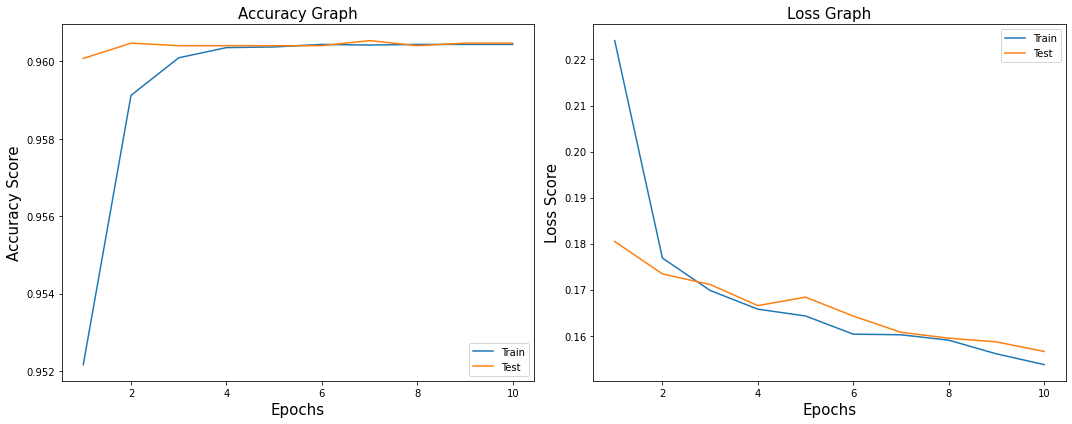

In [ ]:
history_graph(history,10)

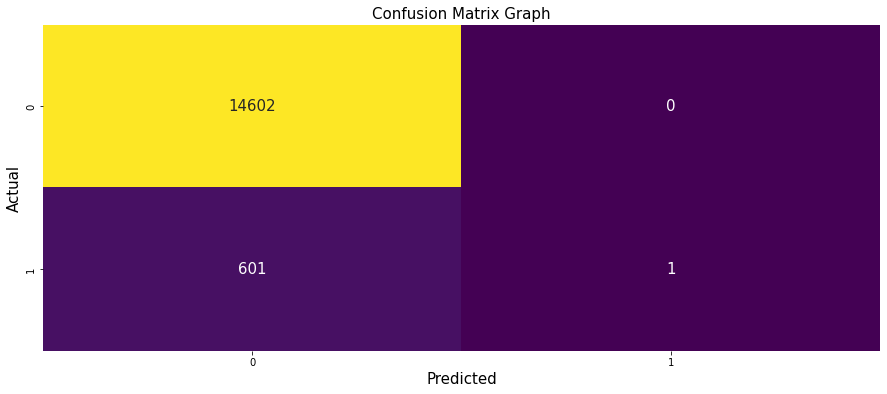

In [ ]:
y_pred = model.predict(last_test)
y_pred_max = [1 if i > 0.5 else 0 for i in y_pred]

confusion_graph(y_test, y_pred_max)